1. Generate random variants:
    * every base pair is every other base pair (single point mutation)
    * insertions/deletions

In [ ]:
import pandas as pd

seq = 'gcaggggagauaccaugaucacgaaggugguuuucccagggcgaggcuuauccauugcacuccggaugugcugaccccugcgauuuccccaaaugugggaaacucgacugcggggacugcguucgcgcuuuccccug'
df = pd.DataFrame({'sequence':[], 'type of mutation':[]})
#create the point mutations
for i in range(len(seq)):
    if(seq[i] != 'a'):
        df.loc[len(df)] = [seq[0:i] + 'a' + seq[i+1:len(seq)], 'point at idx ' + str(i)]
    if(seq[i] != 'g'):
        df.loc[len(df)] = [seq[0:i] + 'g' + seq[i+1:len(seq)], 'point at idx ' + str(i)]
    if(seq[i] != 'c'):
        df.loc[len(df)] = [seq[0:i] + 'c' + seq[i+1:len(seq)], 'point at idx ' + str(i)]
    if(seq[i] != 't'):
        df.loc[len(df)] = [seq[0:i] + 't' + seq[i+1:len(seq)], 'point at idx ' + str(i)]

# single deletion at every index
for i in range(len(seq)):
    df.loc[len(df)] = [seq[0:i] + seq[i+1:len(seq)], 'deletion at idx ' + str(i)]

# single insertion of every bp at every index
for i in range(len(seq)):
    df.loc[len(df)] = [seq[0:i] + 'a' + seq[i:len(seq)], 'insertion at idx '+ str(i)]
    df.loc[len(df)] = [seq[0:i] + 'g' + seq[i:len(seq)], 'insertion at idx '+ str(i)]
    df.loc[len(df)] = [seq[0:i] + 'c' + seq[i:len(seq)], 'insertion at idx '+ str(i)]
    df.loc[len(df)] = [seq[0:i] + 't' + seq[i:len(seq)], 'insertion at idx '+ str(i)]

# add the "nnnnns" at i = 110 to force the correct molecule stucture
filler = "nnnnnnnnnnnnnnnnnnnnnnnn"

df['sequence'] = df['sequence'].apply(lambda x: x[0:110] + filler + x[110:len(x)])

In [ ]:
import RNA
# get rna folding structure using viennaRNA's tools and identify most stable mutations
structures, mfes = zip(*[RNA.fold(seq) for seq in df['sequence']])
df['Structure'] = structures
df['MFE'] = mfes
df_sorted = df.sort_values('MFE')

In [37]:
df_sorted

,sequence,type of mutation,Structure,MFE
913,gcaggggagauaccaugaucacgaaggugguuuucccagggcgagg...,insertion at idx 83,.(((((((((......((((((....))))))....(((((.(.((...,-61.599998
881,gcaggggagauaccaugaucacgaaggugguuuucccagggcgagg...,insertion at idx 75,.(((((((((......((((((....))))))....(((((((.((...,-60.900002
936,gcaggggagauaccaugaucacgaaggugguuuucccagggcgagg...,insertion at idx 89,.(((((((((......((((((....))))))....(((((.(.((...,-59.400002
965,gcaggggagauaccaugaucacgaaggugguuuucccagggcgagg...,insertion at idx 96,.(((((((((......((((((....))))))....(((((.(.((...,-59.299999
973,gcaggggagauaccaugaucacgaaggugguuuucccagggcgagg...,insertion at idx 98,.(((((((((......((((((....))))))....(((((.(.((...,-59.299999
...,...,...,...,...
424,gcaggggagauaccaugaucacgaaggugguuuucccagggcgagg...,point at idx 131,.(((((((((.(((((..........)))))))))))((((.(.((...,-47.700001
316,gcaggggagauaccaugaucacgaaggugguuuucccagggcgagg...,point at idx 97,...((((((((.....((((((....))))))...((((((.(.((...,-47.400002
318,gcaggggagauaccaugaucacgaaggugguuuucccagggcgagg...,point at idx 98,...((((((((.....((((((....))))))...((((((.(.((...,-47.400002
430,gcaggggagauaccaugaucacgaaggugguuuucccagggcgagg...,point at idx 133,.(((((((((.(((((..........)))))))))))((((.(.((...,-47.400002


### Project Overview
- Create a snRNA guide prediction algorithm
- Engineer ideal snRNA
- Perform high throughput screens using results from above
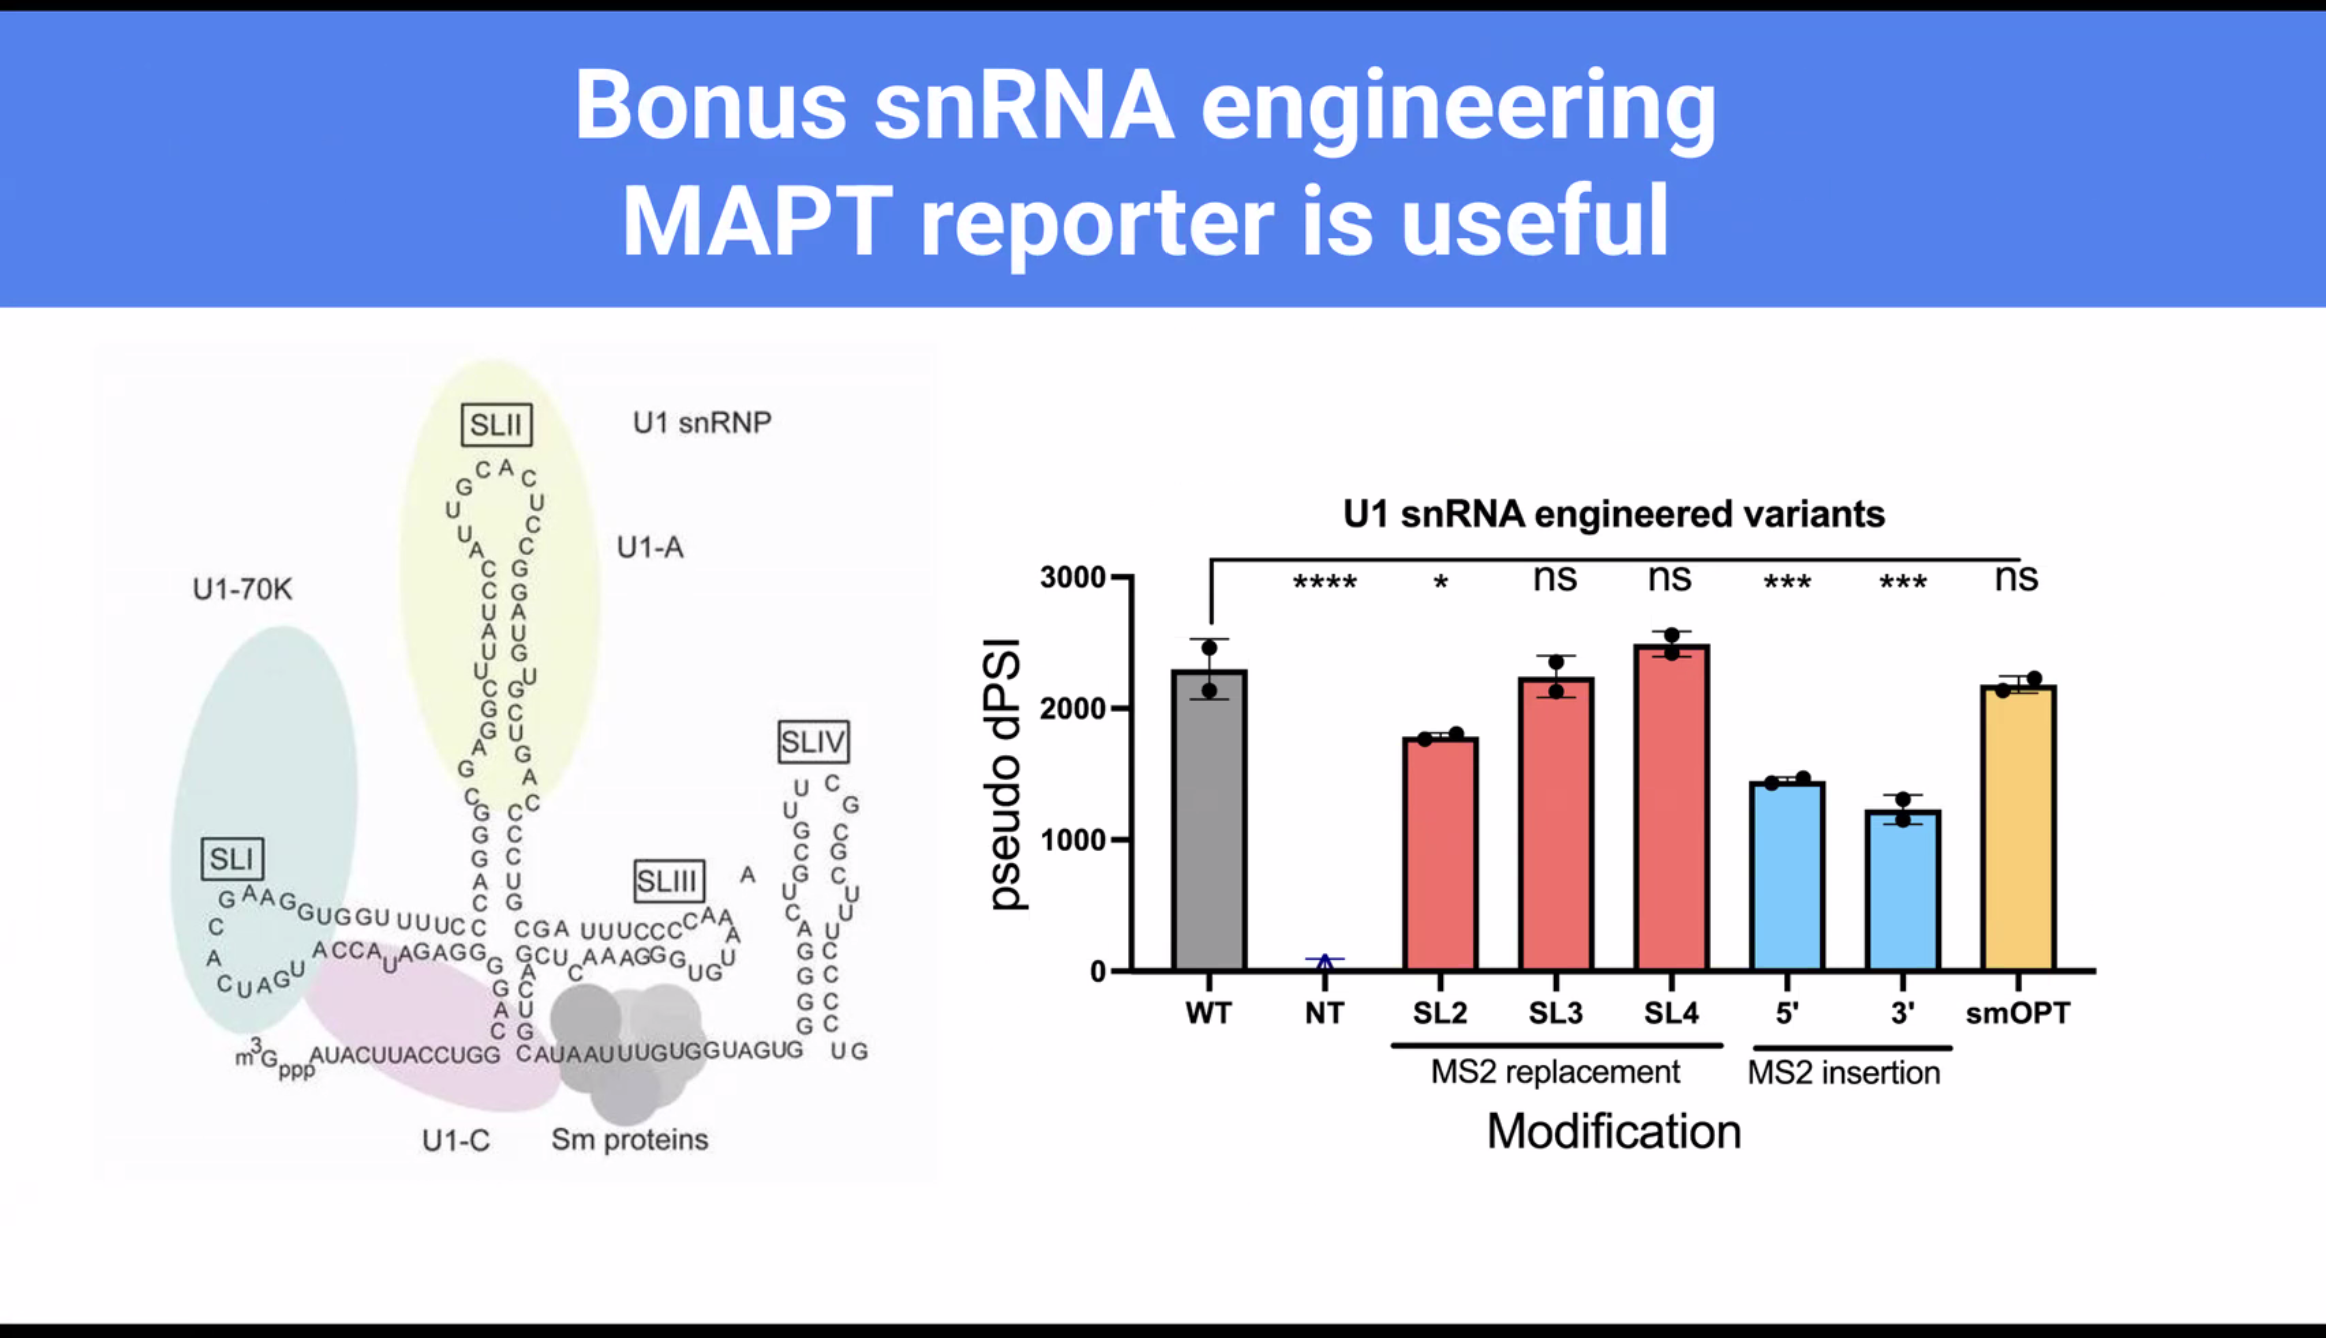


### Project 0: A more stable hairpin
We are attempting to modify SLIV *in silico* in order to find a more stable variation. We are testing different sequences through the use of the folding algorithm and MFE calculator *ViennaRNA*. So far, we have tried a few different forms of this hairpin with their modifications described in `/seqs.md`. Trent reccomended trying g-quadruplex's within the hairpin, but it is hard to determine if the algorithm is able to properly account for this structure in its calculations. So far I have read these two articles explaining the processes behind the *viennaRNA* algorithm: 

[nature](https://www.nature.com/articles/s41580-020-0236-x)

[Nucleac Acids Research](https://academic.oup.com/nar/article/9/1/133/1043226?login=false)

In [4]:
import pandas as pd
import RNA
hp_df = pd.DataFrame({'seq':['gcaggggagauaccaugaucacgaaggugguuuucccagggcgaggcuuauccauugcacuccggaugugcugaccccugcgauuuccccaaaugugggaaacucgacugcnnnnnnnnnnnnnnnnggggacugcguucgcgcuuuccccug',\
                            'gcaggggagauaccaugaucacgaaggugguuuucccagggcgaggcuuauccauugcacuccggaugugcugaccccugcgauuuccccaaaugugggaaacucgacugcnnnnnnnnnnnnnnnnggggacugcguucgcgcaguccccug', \
                            'gcaggggagauaccaugaucacgaaggugguuuucccagggcgaggcuuauccauugcacuccggaugugcugaccccugcgauuuccccaaaugugggaaacucgacugcnnnnnnnnnnnnnnnnggggacugcguucgcccgccgccgug', \
                            'gcaggggagauaccaugaucacgaaggugguuuucccagggcgaggcuuauccauugcacuccggaugugcugaccccugcgauuuccccaaaugugggaaacucgacugcnnnnnnnnnnnnnnnnggggacugggggggggcguucgcgcuuuccccug', \
                            'gcaggggagauaccaugaucacgaaggugguuuucccagggcgaggcuuauccauugcacuccggaugugcugaccccugcgauuuccccaaaugugggaaacucgacugcnnnnnnnnnnnnnnnnggggacugcguuggggggggcgcgcuuuccccug', \
                            'gcaggggagauaccaugaucacgaaggugguuuucccagggcgaggcuuauccauugcacuccggaugugcugaccccugcgauuuccccaaaugugggaaacucgacugcnnnnnnnnnnnnnnnnggggacugcguucgcgggggggggcuuuccccug', \
                            'gcaggggagauaccaugaucacgaaggugguuuucccagggcgaggcuuauccauugcacuccggaugugcugaccccugcgauuuccccaaaugugggaaacucgacugcnnnnnnnnnnnnnnnngggggggg', \
                            'gcaggggagauaccaugaucacgaaggugguuuucccagggcgaggcuuauccauugcacuccggaugugcugaccccugcgauuuccccaaaugugggaaacucgacugcnnnnnnnnnnnnnnnngcgcguucgcgcgu', \
                            'gcaggggagauaccaugaucacgaaggugguuuucccagggcgaggcuuauccauugcacuccggaugugcugaccccugcgauuuccccaaaugugggaaacucgacugcnnnnnnnnnnnnnnnnggggacugcgccgccguucgccggcgggcuuuccccug'\
                                ], \
                            'mutation': ['none', 'u->a (147), u->g (148)', 'ggggacugc->ggcggcggc (132), gcuuucccc->ccgccgccg (147)', 'gggggggg (136)','gggggggg (140)', 'gggggggg (148)', 'no hairpin, g-plex at 128', 'short, stable hairpin', 'same hairpin, longer stem of gccgcc']})
structures, mfes = zip(*[RNA.fold(seq) for seq in hp_df['seq']])
hp_df['Structure'] = structures
hp_df['MFE'] = mfes
hp_df

,seq,mutation,Structure,MFE
0,gcaggggagauaccaugaucacgaaggugguuuucccagggcgagg...,none,((((((((((.(((((..........)))))))))))((((.(.((...,-55.000000
1,gcaggggagauaccaugaucacgaaggugguuuucccagggcgagg...,"u->a (147), u->g (148)",((((((((((.(((((..........)))))))))))((((.(.((...,-62.400002
2,gcaggggagauaccaugaucacgaaggugguuuucccagggcgagg...,"ggggacugc->ggcggcggc (132), gcuuucccc->ccgccgc...",((((((((((.(((((..........)))))))))))((((.(.((...,-47.000000
3,gcaggggagauaccaugaucacgaaggugguuuucccagggcgagg...,gggggggg (136),((((((((((.(((((..........)))))))))))((((.(.((...,-59.599998
4,gcaggggagauaccaugaucacgaaggugguuuucccagggcgagg...,gggggggg (140),((((((((((.(((((..........)))))))))))((((.(.((...,-56.900002
5,gcaggggagauaccaugaucacgaaggugguuuucccagggcgagg...,gggggggg (148),.(((((((((..((....((.((((.(((((((((.(((((.(.((...,-60.299999
6,gcaggggagauaccaugaucacgaaggugguuuucccagggcgagg...,"no hairpin, g-plex at 128",((((((((((.(((((..........)))))))))))((((.(.((...,-41.400002
7,gcaggggagauaccaugaucacgaaggugguuuucccagggcgagg...,"short, stable hairpin",((((((((((.(((((..........)))))))))))((((.(.((...,-47.900002
8,gcaggggagauaccaugaucacgaaggugguuuucccagggcgagg...,"same hairpin, longer stem of gccgcc",((((((((((.(((((..........)))))))))))((((.(.((...,-66.699997


In [ ]:
hp_df[]

Deepseek and my attempt at accounting for gplexes: